# Simple FFT usage

In [116]:
import numpy as np
import cmath
import sys

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

### creating a sine wave

In [118]:
class waveGen:
	
	def __init__(self, freq, BufferSize, waveType, vol):
		
		self.sampleRate = 48000
		self.bufferSize = BufferSize
		self.buffer = np.empty(BufferSize, dtype=np.complex)
		self.frequency = freq
		self.omega = 0
		self.updateOmega()
		self.last = complex(1,0)
		self.type = waveType
		self.volume = vol

	def sineGen(self):

		#start = timer() #reduce function!!! functools
		for i in range(0, self.bufferSize):
			self.buffer[i] = self.last
			self.last=self.last*self.omega

		return self.volume * np.imag(self.buffer).astype(np.float32)

	def squareGen(self):
		#start = timer()
		for i in range(0, self.bufferSize):
			self.buffer[i] = np.sign(self.last)
			self.last=self.last*self.omega

		return np.real(self.volume * self.buffer).astype(np.float32)

	def updateOmega(self):
		self.omega = cmath.exp(1j*(2*cmath.pi * self.frequency / self.sampleRate))

	def updateFreq(self, val):
		self.frequency = val
		self.updateOmega()

	def nextFrame(self):
		if self.type == "sine":
			return self.sineGen()
		elif self.type == "square":
			return self.squareGen()
		elif self.type == "triangle":
			return self.triangleGen()




## Layering sine waves to filter

In [119]:
length = 48000
freq = 200
output = np.zeros(length)
wave = waveGen(freq, length, 'sine', .1)
for i in range(5):
    freq *= 2
    wave.updateFreq(freq)
    output += wave.nextFrame()
    

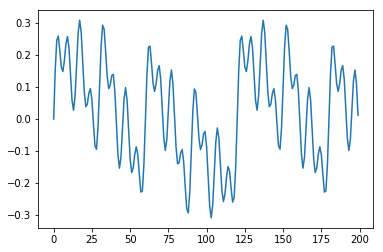

In [120]:
#plotting the first 200 samples
plt.plot(output[:200])
plt.show()

# The FFT

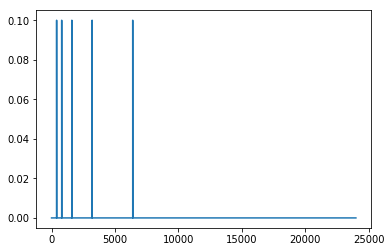

In [121]:
freqSpec = np.fft.fft(output)

#linespaceing
T = 1.0 / 48000.0

#x angle of plot
xf = np.linspace(0.0, 1.0/(2.0*T), length//2)

#ploting the graph
plt.plot(xf, 2.0/length * np.abs(freqSpec[:length//2]))
plt.show()

## Lets try with a square wave

In [122]:
sqrlen = 48000
freq = 440
sqrWave = waveGen(freq, sqrlen, 'square', .1)
square = sqrWave.nextFrame()

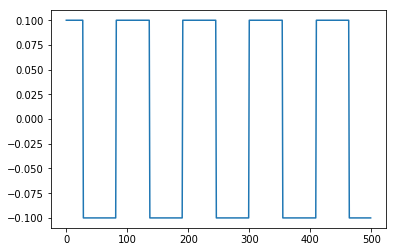

In [123]:
#plotting the first 500 values
plt.plot(square[:500])
plt.show()

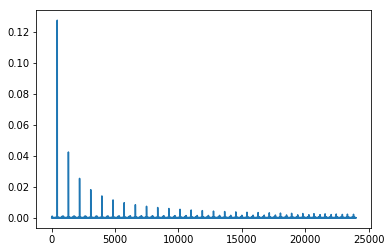

In [124]:
sqrFreqSpec = np.fft.fft(square)

#linespaceing
T = 1.0 / 48000.0

#x angle of plot
xf = np.linspace(0.0, 1.0/(2.0*T), sqrlen//2)

#ploting the graph
plt.plot(xf, 2.0/sqrlen * np.abs(sqrFreqSpec[:sqrlen//2]))
plt.show()

# To revert to time domain: 

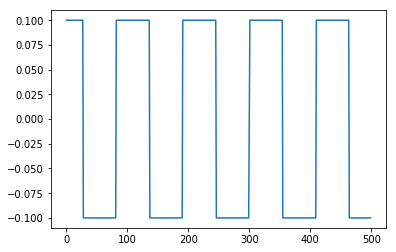

In [125]:
sqrFinal = np.fft.ifft(np.real(sqrFreqSpec))

plt.plot(np.real(sqrFinal[:500]))
plt.show()

# And for the sine 

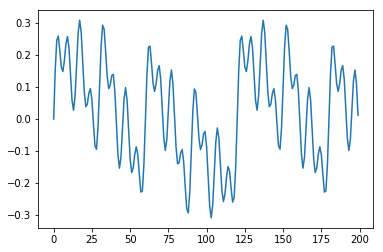

In [126]:
final = np.fft.ifft(np.fft.fft(output))

plt.plot(np.real(final[:200]))
plt.show()

# to check everything

In [127]:
(output == np.real(final)).all() and (square == np.real(sqrFinal)).all()

False

#### shows that there is some distortion
#### so we check for the average difference

In [130]:
#average diff of sine 
sum(abs(output-final)) / len(output)

2.7095403087221137e-16

In [131]:
#average diff of square
sum(abs(square-sqrFinal)) / len(square)

0.0001666666691504886

#### which is at least very small

It is worth noting that the square wave is many times
more distorted than the sine. This is likely due to
aliasing - which is the point of all this work anyway, 
isnt it?